## 1. Camera calibration

Goal: find the intrinsic coordinates and distortion coefficients of the camera.

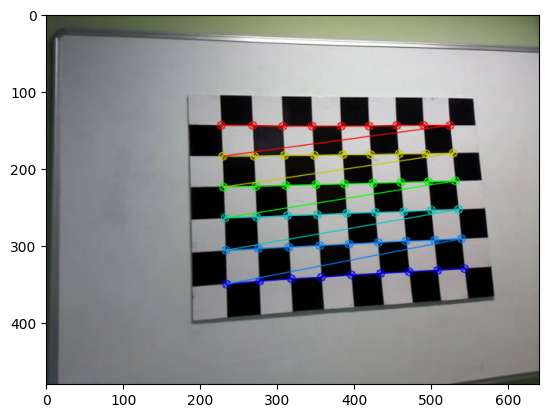

In [57]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv
import glob

criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 30, 0.001)

grid_size = (9, 6)
objp = np.zeros((grid_size[0] * grid_size[1],3), np.float32)
objp[:,:2] = np.mgrid[0:grid_size[0],0:grid_size[1]].T.reshape(-1,2)
# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.
images = glob.glob('calib_[0-9].jpg')
for fname in images:
    img = cv.imread(fname)
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    # Find the chess board corners
    ret, corners = cv.findChessboardCorners(gray, grid_size, None)
    # If found, add object points, image points (after refining them)
    if ret == True:
        objpoints.append(objp)
        corners2 = cv.cornerSubPix(gray,corners, (11,11), (-1,-1), criteria)
        imgpoints.append(corners2)
        # Draw and display the corners
        cv.drawChessboardCorners(img, grid_size, corners2, ret)
        plt.imshow(img)

In [61]:
ret, mtx, dist, rvecs, tvecs = cv.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)
print("RETURN:\n", ret)
print("CAMERA_MATRIX:\n", mtx)
print("DISTORTION:\n", dist)
print("ROTATION:\n", rvecs)
print("TRANSLATION:\n", tvecs)

RETURN:
 0.1370470936872424
CAMERA_MATRIX:
 [[461.91776815   0.         257.02652118]
 [  0.         447.51630544 218.65841729]
 [  0.           0.           1.        ]]
DISTORTION:
 [[ 0.14497122 -0.0349204  -0.00454199 -0.01589941 -0.0887708 ]]
ROTATION:
 (array([[-0.26305009],
       [ 0.16510265],
       [ 3.09573949]]), array([[-0.26305009],
       [ 0.16510265],
       [ 3.09573949]]))
TRANSLATION:
 (array([[ 7.36896023],
       [ 2.93698059],
       [12.07531535]]), array([[ 7.36896023],
       [ 2.93698059],
       [12.07531535]]))


In [62]:
mean_error = 0
for i in range(len(objpoints)):
    imgpoints2, _ = cv.projectPoints(objpoints[i], rvecs[i], tvecs[i], mtx, dist)
    error = cv.norm(imgpoints[i], imgpoints2, cv.NORM_L2)/len(imgpoints2)
    mean_error += error
print( "total error: {}".format(mean_error/len(objpoints)) )

total error: 0.018649573800184192


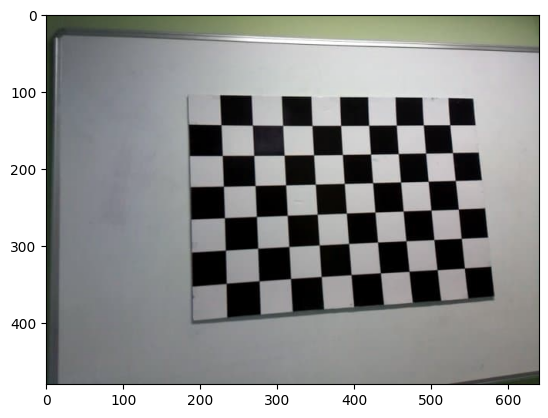

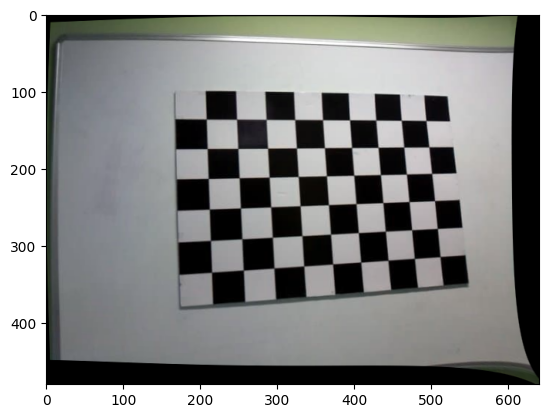

NEW CAMERA MTX:
 [[450.96041753   0.         236.65433108]
 [  0.         436.30565288 208.70786769]
 [  0.           0.           1.        ]]
ROI:
 (6, 11, 598, 437)


In [64]:
img = cv.imread('calib_2.jpg')
h,  w = img.shape[:2]

# undistort image
# dist = np.zeros((1, 5))
newcameramtx, roi = cv.getOptimalNewCameraMatrix(mtx, dist, (w,h), 1, (w,h))
dst = cv.undistort(img, mtx, dist, None, newcameramtx)

# crop the image to the Region of Interest
x, y, w, h = roi
# dst = dst[y:y+h, x:x+w]

plt.imshow(img)
plt.show()
plt.imshow(dst)
plt.show()

print("NEW CAMERA MTX:\n", newcameramtx)
print("ROI:\n", roi)

## 2. Undistort image

## 3. Backproject image

## 4. Warp Perspective transform

https://stackoverflow.com/a/58900781

![](https://i.sstatic.net/BtoDl.png)

```python
import cv2
import math
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('test.jpg')
rows,cols,ch = img.shape

pts1 = np.float32([[360,50],[2122,470],[2264, 1616],[328,1820]])

ratio=1.6
cardH=math.sqrt((pts1[2][0]-pts1[1][0])*(pts1[2][0]-pts1[1][0])+(pts1[2][1]-pts1[1][1])*(pts1[2][1]-pts1[1][1]))
cardW=ratio*cardH;
pts2 = np.float32([[pts1[0][0],pts1[0][1]], [pts1[0][0]+cardW, pts1[0][1]], [pts1[0][0]+cardW, pts1[0][1]+cardH], [pts1[0][0], pts1[0][1]+cardH]])

M = cv2.getPerspectiveTransform(pts1,pts2)

offsetSize=500
transformed = np.zeros((int(cardW+offsetSize), int(cardH+offsetSize)), dtype=np.uint8);
dst = cv2.warpPerspective(img, M, transformed.shape)

plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()
```